In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"noparutch","key":"05f3d6b4e5cbe77f4a5058aabbc06782"}'}

In [ ]:
import os
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c hearth-disease-recognition


mv: cannot stat 'kaggle.json': No such file or directory
hearth-disease-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

with zipfile.ZipFile("hearth-disease-recognition.zip", "r") as zip_ref:
    zip_ref.extractall("heart_data")

import pandas as pd
df_train = pd.read_csv("heart_data/train.csv")
df_test = pd.read_csv("heart_data/test.csv")

In [ ]:
df_test.head()

,ID,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day)
0,test_000001,Yes,Yes,Yes,24.84,No,No,No,Yes,No,Yes,No,Good,No,Female,Some college or technical school,"$20,000 to less than $25,000",71,Yes
1,test_000002,Yes,No,Yes,29.08,Yes,No,No,No,No,Yes,No,Fair,No,Female,College graduate,"$50,000 to less than $75,000",61,No
2,test_000003,Yes,Yes,Yes,35.23,Yes,No,No,No,No,Yes,No,Fair,Yes,Female,Some college or technical school,"Less than $10,000",67,Yes
3,test_000004,No,No,Yes,24.78,Yes,No,No,No,No,Yes,No,Fair,No,Female,Some college or technical school,"$50,000 to less than $75,000",50,Yes
4,test_000005,No,No,Yes,27.57,Yes,No,No,No,No,Yes,No,Fair,No,Male,Some college or technical school,"$25,000 to less than $35,000",40,Yes


In [ ]:
df_test.describe()

,Body Mass Index,Age
count,74361.000000,74361.000000
mean,28.402408,57.722112
std,6.598611,16.449871
min,11.490000,18.000000
25%,24.110000,47.000000
50%,27.300000,59.000000
75%,31.350000,69.000000
max,96.950000,100.000000


# **Clean data & Feature engineering**


In [ ]:
df_test.isnull().sum()

,0
ID,0
High Blood Pressure,0
Told High Cholesterol,0
Cholesterol Checked,0
Body Mass Index,0
Smoked 100+ Cigarettes,0
Diagnosed Stroke,0
Diagnosed Diabetes,0
Leisure Physical Activity,0
Heavy Alcohol Consumption,0


In [ ]:
train_clean1 = df_train.dropna(subset=["History of HeartDisease or Attack"]).copy()
train_clean1 = train_clean1.drop(columns=["Education Level","Income Level"])
train_clean1["Told High Cholesterol"] = train_clean1["Told High Cholesterol"].fillna("No")
train_clean1["Body Mass Index"] = train_clean1["Body Mass Index"].fillna(train_clean1["Body Mass Index"].median())
train_clean1['Age'] = (train_clean1['Age'] / 10)


test_clean1 = df_test.drop(columns=["Education Level","Income Level"])
test_clean1["Told High Cholesterol"] = test_clean1["Told High Cholesterol"].fillna("No")
test_clean1["Body Mass Index"] = test_clean1["Body Mass Index"].fillna(test_clean1["Body Mass Index"].median())
test_clean1['Age'] = (test_clean1['Age'] / 10)

# train_clean1.isnull().sum()
train_clean1.head()

,ID,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Age,Vegetable or Fruit Intake (1+ per Day)
0,train_000001,No,Yes,Yes,Yes,40.68,Yes,No,No,No,No,Yes,No,Very Poor,Yes,Female,6.4,Yes
1,train_000002,No,No,No,No,24.36,Yes,No,No,Yes,No,No,Yes,Fair,No,Female,5.0,No
2,train_000003,No,Yes,Yes,Yes,27.33,No,No,No,No,No,Yes,Yes,Very Poor,Yes,Female,6.1,Yes
3,train_000004,No,Yes,No,Yes,27.01,No,No,No,Yes,No,Yes,No,Good,No,Female,7.4,Yes
5,train_000006,No,Yes,Yes,Yes,25.11,Yes,No,No,Yes,No,Yes,No,Good,No,Male,6.7,Yes


In [ ]:
train_clean1.groupby("Age").size().sort_index(ascending=False)

,0
Age,
10.0,612
9.9,624
9.8,623
9.7,576
9.6,625
...,...
2.2,1663
2.1,1664
2.0,1577


In [ ]:
health_map = {
    "Excellent": 5,
    "Good": 4,
    "Fair": 3,
    "Poor": 2,
    "Very Poor": 1
}

train_clean1["General Health"] = train_clean1["General Health"].map(health_map)
test_clean1["General Health"] = test_clean1["General Health"].map(health_map)

yes_no_columns = [
    "Smoked 100+ Cigarettes",
    "Diagnosed Stroke",
    "Diagnosed Diabetes",
    "Leisure Physical Activity",
    "Heavy Alcohol Consumption",
    "Health Care Coverage",
    "Doctor Visit Cost Barrier",
    "Vegetable or Fruit Intake (1+ per Day)",
    "High Blood Pressure",
    "Told High Cholesterol",
    "Cholesterol Checked",
    "Difficulty Walking"
]

train_clean1["History of HeartDisease or Attack"] = train_clean1["History of HeartDisease or Attack"].map({"Yes": 1, "No": 0})
for col in yes_no_columns:
    train_clean1[col] = train_clean1[col].map({"Yes": 1, "No": 0})
    test_clean1[col] = test_clean1[col].map({"Yes": 1, "No": 0})

train_clean1["Sex"] = train_clean1["Sex"].map({"Male": 1, "Female": 0})
test_clean1["Sex"] = test_clean1["Sex"].map({"Male": 1, "Female": 0})

train_clean2 = train_clean1.dropna(subset=["Smoked 100+ Cigarettes","Diagnosed Diabetes","Doctor Visit Cost Barrier","General Health","Difficulty Walking"]).copy()

test_clean2 = test_clean1.dropna(subset=["Smoked 100+ Cigarettes","Diagnosed Diabetes","Doctor Visit Cost Barrier","General Health","Difficulty Walking"]).copy()
train_clean2.head()

,ID,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Age,Vegetable or Fruit Intake (1+ per Day)
0,train_000001,0,1,1,1,40.68,1.0,0,0.0,0,0,1,0.0,1.0,1.0,0,6.4,1
1,train_000002,0,0,0,0,24.36,1.0,0,0.0,1,0,0,1.0,3.0,0.0,0,5.0,0
2,train_000003,0,1,1,1,27.33,0.0,0,0.0,0,0,1,1.0,1.0,1.0,0,6.1,1
3,train_000004,0,1,0,1,27.01,0.0,0,0.0,1,0,1,0.0,4.0,0.0,0,7.4,1
5,train_000006,0,1,1,1,25.11,1.0,0,0.0,1,0,1,0.0,4.0,0.0,1,6.7,1


In [ ]:
test_clean2.head()

,ID,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Age,Vegetable or Fruit Intake (1+ per Day)
0,test_000001,1,1,1,24.84,0,0,0,1,0,1,0,4,0,0,7.1,1
1,test_000002,1,0,1,29.08,1,0,0,0,0,1,0,3,0,0,6.1,0
2,test_000003,1,1,1,35.23,1,0,0,0,0,1,0,3,1,0,6.7,1
3,test_000004,0,0,1,24.78,1,0,0,0,0,1,0,3,0,0,5.0,1
4,test_000005,0,0,1,27.57,1,0,0,0,0,1,0,3,0,1,4.0,1


In [ ]:
train_clean2_numeric = train_clean2.select_dtypes(include=['number'])

correlation_matrix = train_clean2_numeric.corr()

print(correlation_matrix["History of HeartDisease or Attack"])

History of HeartDisease or Attack         1.000000
High Blood Pressure                       0.218884
Told High Cholesterol                     0.196579
Cholesterol Checked                       0.102356
Body Mass Index                           0.057222
Smoked 100+ Cigarettes                    0.110887
Diagnosed Stroke                          0.208166
Diagnosed Diabetes                        0.175615
Leisure Physical Activity                -0.077131
Heavy Alcohol Consumption                -0.028304
Health Care Coverage                      0.034424
Doctor Visit Cost Barrier                 0.020004
General Health                           -0.246878
Difficulty Walking                        0.214683
Sex                                       0.076425
Age                                       0.231312
Vegetable or Fruit Intake (1+ per Day)   -0.019467
Name: History of HeartDisease or Attack, dtype: float64


# เอาแค่ที่มีค่า Correlation ที่มีตัวเลขเกิน 10 **เท่านั้น**

In [ ]:
# train_clean2 = train_clean2.drop(columns=["Cholesterol Checked","Body Mass Index","Leisure Physical Activity", "Heavy Alcohol Consumption", "Health Care Coverage" , "Doctor Visit Cost Barrier", "Sex" , "Vegetable or Fruit Intake (1+ per Day)"])
# test_clean2 = test_clean2.drop(columns=["Cholesterol Checked","Body Mass Index","Leisure Physical Activity", "Heavy Alcohol Consumption", "Health Care Coverage" , "Doctor Visit Cost Barrier", "Sex" , "Vegetable or Fruit Intake (1+ per Day)"])


# train_clean2.head()

,ID,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,General Health,Difficulty Walking,Age
0,train_000001,0,1,1,1.0,0,0.0,1.0,1.0,6.4
1,train_000002,0,0,0,1.0,0,0.0,3.0,0.0,5.0
2,train_000003,0,1,1,0.0,0,0.0,1.0,1.0,6.1
3,train_000004,0,1,0,0.0,0,0.0,4.0,0.0,7.4
5,train_000006,0,1,1,1.0,0,0.0,4.0,0.0,6.7


In [ ]:
print(f"จำนวนแถวของ train_clean2: {train_clean2.shape[0]}")
print(f"จำนวนคอลั่มของ train_clean2: {train_clean2.shape[1]}")

print(f"จำนวนแถวของ test_clean2: {test_clean2.shape[0]}")
print(f"จำนวนคอลั่มของ test_clean2: {test_clean2.shape[1]}")

test_clean2.isnull().sum()

จำนวนแถวของ train_clean2: 221382
จำนวนคอลั่มของ train_clean2: 18
จำนวนแถวของ test_clean2: 74361
จำนวนคอลั่มของ test_clean2: 17


,0
ID,0
High Blood Pressure,0
Told High Cholesterol,0
Cholesterol Checked,0
Body Mass Index,0
Smoked 100+ Cigarettes,0
Diagnosed Stroke,0
Diagnosed Diabetes,0
Leisure Physical Activity,0
Heavy Alcohol Consumption,0


**BP_Age**   ความดันสูงเมื่ออายุมากขึ้นอาจมีผล

**Cholesterol_Age**   คอเลสเตอรอลสูงเมื่ออายุมากขึ้น

**Diabetes_BP**   คนที่เป็นเบาหวานและความดันสูง อาจมีโอกาสเป็นโรคหัวใจสูงขึ้น #ไม่ใช้แล้ว

In [ ]:
train_clean2['BP_Age'] = train_clean2['High Blood Pressure'] * train_clean2['Age']
train_clean2['Cholesterol_Age'] = train_clean2['Told High Cholesterol'] * train_clean2['Age']

test_clean2['BP_Age'] = test_clean2['High Blood Pressure'] * test_clean2['Age']
test_clean2['Cholesterol_Age'] = test_clean2['Told High Cholesterol'] * test_clean2['Age']

train_clean2.head()

,ID,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Age,Vegetable or Fruit Intake (1+ per Day),BP_Age,Cholesterol_Age
0,train_000001,0,1,1,1,40.68,1.0,0,0.0,0,0,1,0.0,1.0,1.0,0,6.4,1,6.4,6.4
1,train_000002,0,0,0,0,24.36,1.0,0,0.0,1,0,0,1.0,3.0,0.0,0,5.0,0,0.0,0.0
2,train_000003,0,1,1,1,27.33,0.0,0,0.0,0,0,1,1.0,1.0,1.0,0,6.1,1,6.1,6.1
3,train_000004,0,1,0,1,27.01,0.0,0,0.0,1,0,1,0.0,4.0,0.0,0,7.4,1,7.4,0.0
5,train_000006,0,1,1,1,25.11,1.0,0,0.0,1,0,1,0.0,4.0,0.0,1,6.7,1,6.7,6.7


In [ ]:
test_clean2.head()

,ID,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Age,Vegetable or Fruit Intake (1+ per Day),BP_Age,Cholesterol_Age
0,test_000001,1,1,1,24.84,0,0,0,1,0,1,0,4,0,0,7.1,1,7.1,7.1
1,test_000002,1,0,1,29.08,1,0,0,0,0,1,0,3,0,0,6.1,0,6.1,0.0
2,test_000003,1,1,1,35.23,1,0,0,0,0,1,0,3,1,0,6.7,1,6.7,6.7
3,test_000004,0,0,1,24.78,1,0,0,0,0,1,0,3,0,0,5.0,1,0.0,0.0
4,test_000005,0,0,1,27.57,1,0,0,0,0,1,0,3,0,1,4.0,1,0.0,0.0


## **test set**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import fbeta_score, make_scorer, confusion_matrix
from scipy.stats import uniform, randint

# คำนวณสัดส่วน class 1 และ 0
num_class_1 = train_clean2['History of HeartDisease or Attack'].sum()
num_class_0 = len(train_clean2) - num_class_1
scale_pos_weight = num_class_0 / num_class_1

class_1 = train_clean2[train_clean2['History of HeartDisease or Attack'] == 1]
class_0 = train_clean2[train_clean2['History of HeartDisease or Attack'] == 0]

class_0_sampled = class_0.sample(n=len(class_1), random_state=42)
train_balanced = pd.concat([class_1, class_0_sampled])

X = train_balanced.drop(columns=['History of HeartDisease or Attack', 'ID'])
y = train_balanced['History of HeartDisease or Attack']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# พารามิเตอร์ที่ใช้ใน RandomizedSearchCV
param_dist = {
    'learning_rate': uniform(0.01, 0.05),
    'max_depth': randint(3, 7),
    'min_child_weight': randint(1, 5),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'n_estimators': randint(100, 400),
    'scale_pos_weight': [scale_pos_weight],
    'gamma': uniform(0, 0.3),
    'reg_lambda': uniform(0, 5)
}

xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', use_label_encoder=False)

# สร้าง scorer สำหรับ F2 score
f2_scorer = make_scorer(fbeta_score, beta=2)

# ใช้ F2 score ในการประเมินผล
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_dist,
    n_iter=20, cv=3, scoring=f2_scorer, n_jobs=-1, random_state=50
)
random_search.fit(X_scaled, y)

# หาพารามิเตอร์ที่ดีที่สุด
best_params = random_search.best_params_

# ใช้ StratifiedKFold
kf = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

f2_scores = []  # เก็บ F2 score
cm_total = np.zeros((2, 2))  # confusion matrix รวมทั้งหมด

# การทดสอบในแต่ละ fold
for train_index, test_index in kf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = xgb.XGBClassifier(**best_params)
    model.fit(X_train, y_train)

    y_prob = model.predict_proba(X_test)[:, 1]

    threshold = 0.6
    y_pred = (y_prob >= threshold).astype(int)

    # คำนวณ F2 score
    f2_scores.append(fbeta_score(y_test, y_pred, beta=2))
    cm_total += confusion_matrix(y_test, y_pred)

print(f"Average F2 Score: {np.mean(f2_scores):.4f}")
print("Confusion Matrix (Total):")
print(cm_total)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:43:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Average F2 Score: 0.8768
Confusion Matrix (Total):
[[ 7748. 10318.]
 [  505. 17561.]]


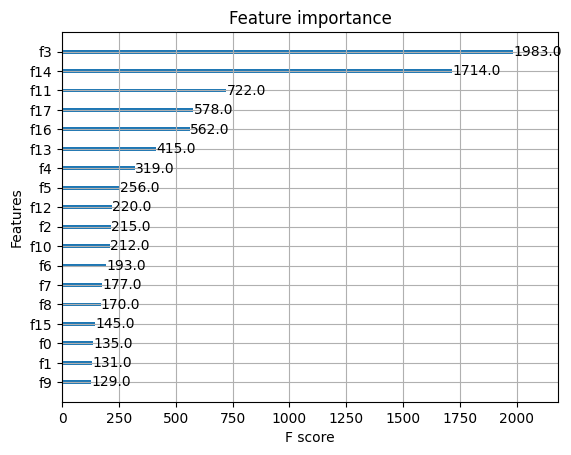

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()

In [ ]:
import joblib

joblib.dump(model, "xgb_heart_disease_model.pkl")
print("Model saved successfully!")

Model saved successfully!


In [ ]:
loaded_model = joblib.load("xgb_heart_disease_model.pkl")

In [ ]:
import pandas as pd
import xgboost as xgb
import numpy as np

# โหลด sample_submission.csv เพื่อดึง valid_ids
sample_submission = pd.read_csv('heart_data/sample_submission.csv')
valid_ids = sample_submission["ID"]

# กรองข้อมูลจาก test_clean2 ให้ตรงกับ valid_ids
filtered_test = test_clean2[test_clean2["ID"].isin(valid_ids)].copy()

# ลบคอลัมน์ "ID"
X_test_filtered = filtered_test.drop(columns=["ID"])

# แปลง X_test_filtered เป็น numpy array (แทนการใช้ DMatrix)
X_test_array = X_test_filtered.values

# ทำนายผลโดยใช้โมเดลที่โหลดแล้ว
y_pred_test = loaded_model.predict(X_test_array)

# ปัดค่าให้เป็น 0 หรือ 1
y_pred_test = np.round(y_pred_test).astype(int)

# สร้าง DataFrame สำหรับ submission
submission = pd.DataFrame({
    "ID": filtered_test["ID"],
    "History of HeartDisease or Attack": y_pred_test
})

# เปลี่ยนค่า 0 และ 1 เป็น "No" และ "Yes"
submission["History of HeartDisease or Attack"] = submission["History of HeartDisease or Attack"].replace({1: "Yes", 0: "No"})

# บันทึกไฟล์การทำนาย
submission.to_csv("final_submission.csv", index=False)

print("การทำนายเสร็จสิ้น! ไฟล์ถูกบันทึกเป็น final_submission.csv")

การทำนายเสร็จสิ้น! ไฟล์ถูกบันทึกเป็น final_submission.csv


In [ ]:
df_submission = pd.read_csv('final_submission.csv')
df_submission["History of HeartDisease or Attack"].value_counts()

,count
History of HeartDisease or Attack,
Yes,74361


# **Logistic Regression**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from scipy.stats import uniform, randint
import numpy as np

# สร้าง custom scorer สำหรับ F2 score
f2_scorer = make_scorer(fbeta_score, beta=2)

# สมมติว่า train_clean2 เป็นข้อมูลที่มีการทำความสะอาดแล้ว
X = train_clean2.drop(columns=['History of HeartDisease or Attack', 'ID'])
y = train_clean2['History of HeartDisease or Attack']

# แบ่งข้อมูลเป็น train และ test (80% : 20%) โดยใช้ stratify เพื่อให้สัดส่วน class 1 : class 0 เท่ากัน
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ตรวจสอบจำนวนของแต่ละ class ใน train และ test set
print(f"Train set - Class 0: {y_train.value_counts()[0]}, Class 1: {y_train.value_counts()[1]}")
print(f"Test set - Class 0: {y_test.value_counts()[0]}, Class 1: {y_test.value_counts()[1]}")

# ใช้ RandomUnderSampler เพื่อลดจำนวนข้อมูลใน Class 0 ให้เท่ากับ Class 1
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)

# ตรวจสอบจำนวนของแต่ละ class ใน train set หลังทำ undersampling
print(f"After Undersampling - Class 0: {y_train_res.value_counts()[0]}, Class 1: {y_train_res.value_counts()[1]}")

# ใช้ StratifiedKFold สำหรับการแบ่ง train set ออกเป็น k-fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# สร้าง StandardScaler หรือสามารถลองใช้ MinMaxScaler หรือ RobustScaler ได้
scaler = MinMaxScaler()  # ลองใช้ MinMaxScaler ดู
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# ค่าพารามิเตอร์ที่จะแสวงหาจาก RandomizedSearchCV
param_dist = {
    'C': uniform(0.01, 10),  # Regularization parameter
    'solver': ['liblinear', 'saga'],  # เอาเฉพาะ solver ที่รองรับ penalty ได้
    'max_iter': randint(100, 500),  # เพิ่ม max_iter ให้สูงขึ้นเพื่อให้โมเดลฝึกได้ดีขึ้น
    'penalty': ['l1', 'l2'],  # เลือกเฉพาะ penalty ที่รองรับ
    'class_weight': ['balanced', None],  # เพิ่มตัวเลือก class_weight
}

# สร้างโมเดล Logistic Regression
logreg_model = LogisticRegression(random_state=42)

# ทำการหาค่าพารามิเตอร์ที่ดีที่สุดโดยใช้ RandomizedSearchCV โดยใช้ F2 score เป็นการวัดผล
random_search = RandomizedSearchCV(
    logreg_model, param_distributions=param_dist,
    n_iter=30, cv=5, scoring=f2_scorer, n_jobs=-1, random_state=50  # เพิ่ม n_iter และ cv
)

random_search.fit(X_train_res_scaled, y_train_res)

# หาพารามิเตอร์ที่ดีที่สุด
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# ทำการฝึกโมเดลและประเมินผล F2 score ด้วย K-fold cross-validation
f2_scores = []
for train_index, val_index in kf.split(X_train_res_scaled, y_train_res):
    X_train_fold, X_val_fold = X_train_res_scaled[train_index], X_train_res_scaled[val_index]
    y_train_fold, y_val_fold = y_train_res.iloc[train_index], y_train_res.iloc[val_index]

    # สร้างโมเดล Logistic Regression ใหม่ด้วยพารามิเตอร์ที่ดีที่สุด
    model = LogisticRegression(**best_params)
    model.fit(X_train_fold, y_train_fold)

    # ทำนายผลใน validation set
    y_val_pred = model.predict(X_val_fold)

    # คำนวณ F2 score
    f2 = fbeta_score(y_val_fold, y_val_pred, beta=2)
    f2_scores.append(f2)

# แสดงผล F2 score จากแต่ละ fold
print(f"Average F2 score from cross-validation: {np.mean(f2_scores):.4f}")

# ทดสอบโมเดลกับ test set
model = LogisticRegression(**best_params)
model.fit(X_train_res_scaled, y_train_res)
y_test_pred = model.predict(X_test_scaled)

# คำนวณ F2 score สำหรับ test set
f2_test = fbeta_score(y_test, y_test_pred, beta=2)
print(f"Test F2 score after Undersampling: {f2_test:.4f}")

Train set - Class 0: 162652, Class 1: 14453
Test set - Class 0: 40664, Class 1: 3613
After Undersampling - Class 0: 14453, Class 1: 14453
Best Hyperparameters: {'C': 0.149053656832, 'class_weight': 'balanced', 'max_iter': 156, 'penalty': 'l1', 'solver': 'liblinear'}
Average F2 score from cross-validation: 0.7998
Test F2 score after Undersampling: 0.5378


In [ ]:
import joblib
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# ฝึกโมเดลกับข้อมูลที่ปรับสเกลแล้ว (สมมติว่า X_train_res_scaled, y_train_res เป็นข้อมูลที่ถูกปรับสเกล)
# model.fit(X_train_res_scaled, y_train_res)

# Save โมเดล
joblib.dump(model, "logreg_heart_disease_model.pkl")
print("Model saved successfully!")

# Load โมเดลที่บันทึกไว้
loaded_model = joblib.load("logreg_heart_disease_model.pkl")

# โหลด sample_submission.csv เพื่อดึง valid_ids
sample_submission = pd.read_csv('heart_data/sample_submission.csv')
valid_ids = sample_submission["ID"]

# กรองข้อมูลจาก test_clean2 ให้ตรงกับ valid_ids
filtered_test = test_clean2[test_clean2["ID"].isin(valid_ids)].copy()

# ลบคอลัมน์ "ID"
X_test_filtered = filtered_test.drop(columns=["ID"])

# สร้าง StandardScaler สำหรับการปรับสเกลข้อมูล
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test_filtered)

# ทำนายผลโดยใช้โมเดลที่โหลดแล้ว
y_pred_test = loaded_model.predict(X_test_scaled)

# ปัดค่าให้เป็น 0 หรือ 1
y_pred_test = np.round(y_pred_test).astype(int)

# สร้าง DataFrame สำหรับ submission
submission = pd.DataFrame({
    "ID": filtered_test["ID"],
    "History of HeartDisease or Attack": y_pred_test
})

# เปลี่ยนค่า 0 และ 1 เป็น "No" และ "Yes"
submission["History of HeartDisease or Attack"] = submission["History of HeartDisease or Attack"].replace({1: "Yes", 0: "No"})

# บันทึกไฟล์การทำนาย
submission.to_csv("final_submission_logreg.csv", index=False)

print("การทำนายเสร็จสิ้น! ไฟล์ถูกบันทึกเป็น final_submission_logreg.csv")


Model saved successfully!
การทำนายเสร็จสิ้น! ไฟล์ถูกบันทึกเป็น final_submission_logreg.csv
